In [1]:
import netcomp as nc

figscale = 5
figsize = (figscale, 2/3 * figscale)

figures_dir = '/Users/peterwills/google-drive/Research/Graph Distance Study/metrics_paper/figures'
save_figs = True

# Searching for Structure in Preferential Attachment

We've seen that no metric we're using can reliably distinguish pref. attachment from a degree-matched randomization of the same. So, we're going to look for other structures. Let's start with number of triangles, (mean/std dev of) clutering coefficient, and centrality (ditto).

In [2]:
# load in pre-generated graphs
PA = []
rand_1 = []
rand_2 = []
paths = [file for file in os.listdir('pickled_data/graphs/') if '.p' in file]
for path in paths:
    full_path = os.path.join('pickled_data/graphs/',path)
    graph_dict = pickle.load(open(full_path,'rb'))
    PA.append(graph_dict['pref. attachment'])
    rand_1.append(graph_dict['random 1'])
    rand_2.append(graph_dict['random 2'])

## # of Triangles

In [3]:
PA_triangles = []
rand_triangles = []
for PA_graph,random_graph in zip(PA,rand_1):
    PA_triangles.append(sum(nx.triangles(PA_graph).values()) / 3)
    rand_triangles.append(sum(nx.triangles(random_graph).values()) / 3)

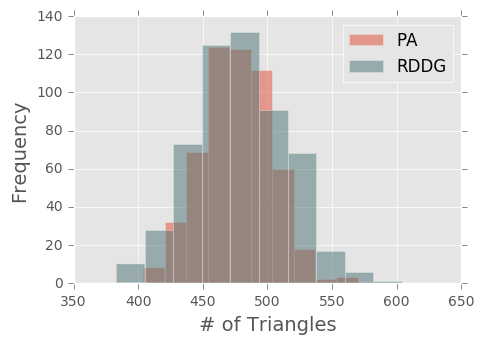

In [4]:
plt.figure(figsize=figsize);

plt.hist(PA_triangles,alpha=0.5,label='PA');
plt.hist(rand_triangles,color=blue,alpha=0.5,label='RDDG');
plt.legend();
plt.xlabel('# of Triangles');
plt.ylabel('Frequency');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'n_triangles.pdf'),dpi=300,bbox_inches='tight');

Looks like the number of triangles migh have a larger variance in the random graph than in preferential attachment. Let's take a look at 

## Clustering Coefficient

In [5]:
PA_clust = []
rand_clust = []
for PA_graph,random_graph in zip(PA,rand_1):
    PA_clust.append(np.mean(list(nx.clustering(PA_graph).values())))
    rand_clust.append(np.mean(list(nx.clustering(random_graph).values())))

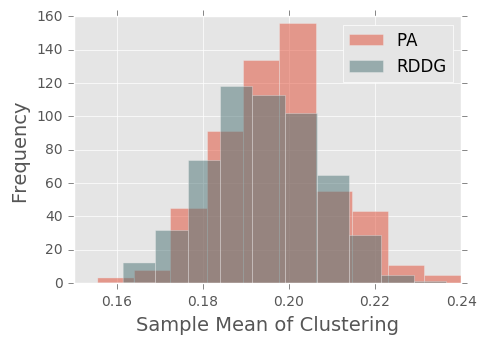

In [6]:
plt.figure(figsize=figsize);

plt.hist(PA_clust,alpha=0.5,label='PA');
plt.hist(rand_clust,color=blue,alpha=0.5,label='RDDG');
plt.legend();
plt.xlabel('Sample Mean of Clustering');
plt.ylabel('Frequency');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'mean_clust.pdf'),dpi=300,bbox_inches='tight');

Some significant distributional differences.

In [7]:
PA_clust_std = []
rand_clust_std = []
for PA_graph,random_graph in zip(PA,rand_1):
    PA_clust_std.append(np.std(list(nx.clustering(PA_graph).values())))
    rand_clust_std.append(np.std(list(nx.clustering(random_graph).values())))

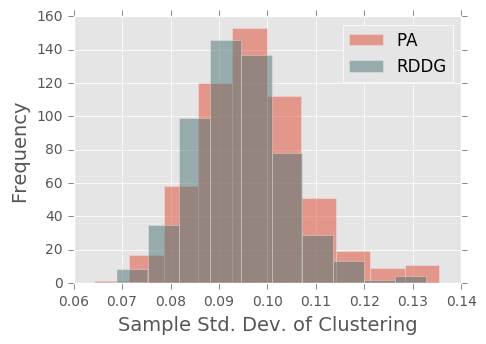

In [8]:
plt.figure(figsize=figsize);

plt.hist(PA_clust_std,alpha=0.5,label='PA');
plt.hist(rand_clust_std,color=blue,alpha=0.5,label='RDDG');
plt.legend();
plt.xlabel('Sample Std. Dev. of Clustering');
plt.ylabel('Frequency');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'std_dev_clust.pdf'),dpi=300,bbox_inches='tight');

Differences in standard deviation are not as compelling as differences in mean.

## Centrality

In [9]:
PA_centr = []
rand_centr = []
for PA_graph,random_graph in zip(PA,rand_1):
    PA_centr.append(np.mean(list(nx.betweenness_centrality(PA_graph).values())))
    rand_centr.append(np.mean(list(nx.betweenness_centrality(random_graph).values())))

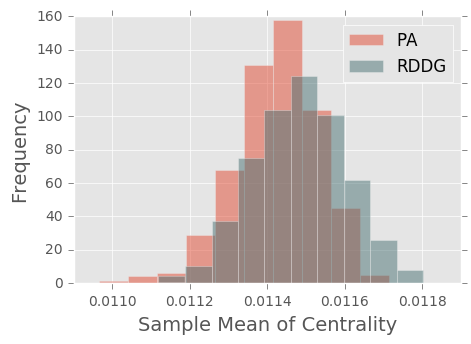

In [10]:
plt.figure(figsize=figsize);

plt.hist(PA_centr,alpha=0.5,label='PA');
plt.hist(rand_centr,color=blue,alpha=0.5,label='RDDG');
plt.legend();
plt.xlabel('Sample Mean of Centrality');
plt.ylabel('Frequency');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'mean_centrality.pdf'),dpi=300,bbox_inches='tight');

Again, some significant differences. So I think the moral of the story is, there are important structural differences that these metrics are NOT capturing.

In [11]:
PA_centr_std = []
rand_centr_std = []
for PA_graph,random_graph in zip(PA,rand_1):
    PA_centr_std.append(np.std(list(nx.betweenness_centrality(PA_graph).values())))
    rand_centr_std.append(np.std(list(nx.betweenness_centrality(random_graph).values())))

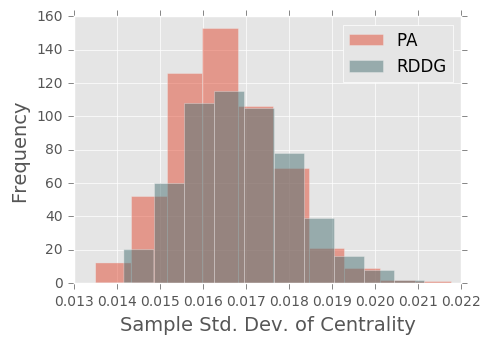

In [12]:
plt.figure(figsize=figsize);

plt.hist(PA_centr_std,alpha=0.5,label='PA');
plt.hist(rand_centr_std,color=blue,alpha=0.5,label='RDDG');
plt.legend();
plt.xlabel('Sample Std. Dev. of Centrality');
plt.ylabel('Frequency');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'std_dev_centrality.pdf'),dpi=300,bbox_inches='tight');

Again, the differences in standard deviation are not as significant as differences in mean.